# Tải tệp dữ liệu vào dataframe

In [1]:
import pandas as pd
import numpy as np

In [2]:
path_file = r"C:\Users\pc\Documents\Test_finpro\Data\VIC.csv"
df_vic = pd.read_csv(path_file)
df_vic.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0


# Xử lý dữ liệu

## Kiểm tra và xử lý dữ liệu NA

In [3]:
missing_data = df_vic.isnull()
missing_data.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [4]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts(), "\n")

Ticker
False    101266
Name: Ticker, dtype: int64 

Date/Time
False    101266
Name: Date/Time, dtype: int64 

Open
False    101266
Name: Open, dtype: int64 

High
False    101266
Name: High, dtype: int64 

Low
False    101266
Name: Low, dtype: int64 

Close
False    101266
Name: Close, dtype: int64 

Volume
False    101266
Name: Volume, dtype: int64 

Open Interest
False    101266
Name: Open Interest, dtype: int64 



Tập dữ liệu không có dữ liệu NA

## Kiểm tra và sửa lại định dạng dữ liệu

In [5]:
df_vic.dtypes

Ticker            object
Date/Time         object
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Open Interest      int64
dtype: object

Cần chỉnh lại dữ liệu ở cột Date/Time từ dạng str sang datetime

In [6]:
df_vic[["Date/Time"]] = df_vic[["Date/Time"]].astype("datetime64")
df_vic.dtypes

Ticker                   object
Date/Time        datetime64[ns]
Open                    float64
High                    float64
Low                     float64
Close                   float64
Volume                    int64
Open Interest             int64
dtype: object

In [7]:
df_vic.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,2018-10-17 09:39:00,98.5,98.5,98.5,98.5,390,0
1,VIC,2018-10-17 09:40:00,98.5,98.5,98.5,98.5,760,0
2,VIC,2018-10-17 09:41:00,98.6,98.6,98.6,98.6,2060,0
3,VIC,2018-10-17 09:42:00,98.6,98.6,98.6,98.6,5540,0
4,VIC,2018-10-17 09:43:00,98.6,98.7,98.6,98.7,760,0


# Phân tích dữ liệu khám phá

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

## Phân tích dữ liệu ngày tháng

In [9]:
date_frame = df_vic["Date/Time"].dt.date.to_frame()
print("Tập dữ liệu chứa thông tin giá cổ phiếu Vingroup từ ngày", min(date_frame["Date/Time"]), "đến ngày", max(date_frame["Date/Time"]))
print("Tổng số ngày là", (max(date_frame["Date/Time"]) - min(date_frame["Date/Time"])).days, "ngày")

Tập dữ liệu chứa thông tin giá cổ phiếu Vingroup từ ngày 2018-10-17 đến ngày 2020-12-22
Tổng số ngày là 797 ngày


In [10]:
# Xem dữ liệu thống kê tổng quát
df_vic.describe()

,Open,High,Low,Close,Volume,Open Interest
count,101266.000000,101266.000000,101266.000000,101266.000000,1.012660e+05,101266.0
mean,105.376460,105.418519,105.334147,105.378791,3.182640e+03,0.0
std,11.543158,11.535584,11.552338,11.545054,1.469814e+04,0.0
min,68.000000,68.000000,68.000000,68.000000,1.000000e+01,0.0
25%,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.0
50%,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.0
75%,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.0
max,126.100000,126.500000,126.100000,126.500000,1.468390e+06,0.0


## Xem sự phân bổ dữ liệu của từng trường dữ liệu bằng biểu đồ hộp

<Axes: >

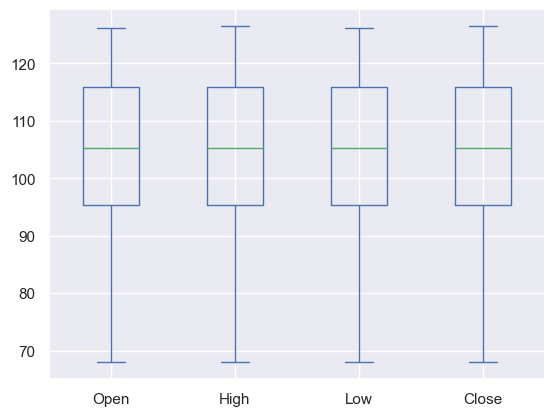

In [11]:
df_vic[["Open", "High", "Low", "Close"]].plot(kind='box')

## Xem giá biến động qua biểu đồ

Text(0.5, 1.0, 'Biến động giá cổ phiếu Vingroup')

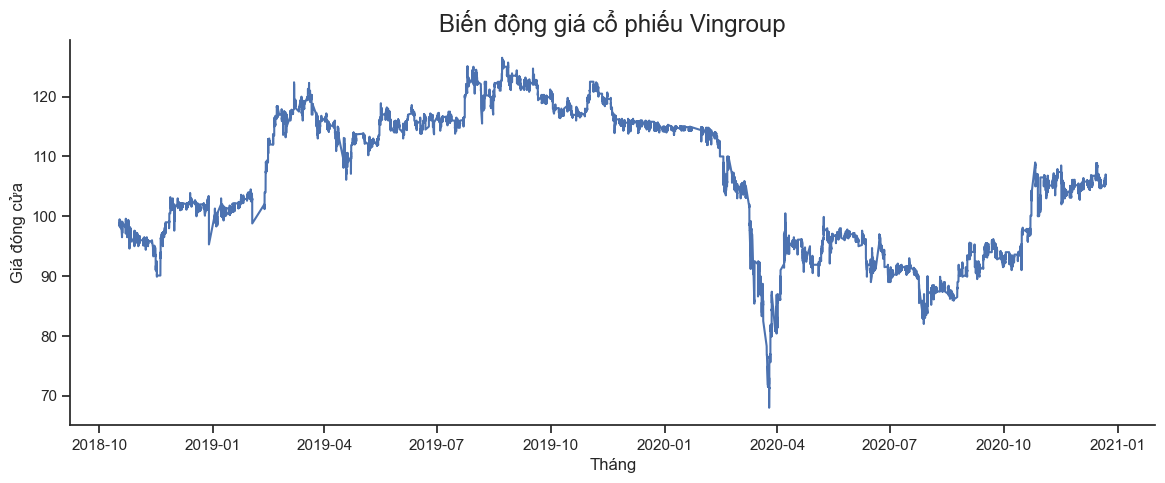

In [12]:
plt.figure(figsize=(14, 5))
sns.set_style("ticks")
sns.lineplot(data=df_vic, x="Date/Time", y="Close")
sns.despine()
plt.xlabel("Tháng")
plt.ylabel("Giá đóng cửa")
plt.title("Biến động giá cổ phiếu Vingroup", size="x-large")

Có thể thấy giá cổ phiếu Vingroup biến động mạnh và có sự không ổn địng đặc biệt từ tháng 02/2020 đến tháng 04/2020 cổ phiếu lao dốc mạnh do tác động của dịch Covid. Tại thời điểm này cổ phiếu đạt mức thấp kỷ lục của giai đoạn từ tháng 12/2018 đến tháng 12/2021. Kể từ đó mặc dù cổ phiếu có xu hướng tăng trưởng trở lại nhưng vẫn chưa đạt được mức cao như gi đoạn tháng 02/2019 đến tháng 02/2020.

Do cổ phiếu biến động mạnh và không ổn định, gần như khó có thể sử dụng mô hình hồi quy tuyến tính. Tuy nhiên chúng ta vẫn sẽ thử và sau đó so sánh với mô hình hồi quy đa thức.

# Xây dựng mô hình dự báo giá cổ phiếu

## Mô hình hồi quy tuyến tính

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
# Tiền xử lý dữ liệu để train và fit vào mô hình học máy
df_vic['date'] = df_vic['Date/Time'].dt.day
df_vic['month'] = df_vic['Date/Time'].dt.month
df_vic['year'] = df_vic['Date/Time'].dt.year
df_vic['hour'] = df_vic['Date/Time'].dt.hour
df_vic['minute'] = df_vic['Date/Time'].dt.minute
df_vic.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,date,month,year,hour,minute
0,VIC,2018-10-17 09:39:00,98.5,98.5,98.5,98.5,390,0,17,10,2018,9,39
1,VIC,2018-10-17 09:40:00,98.5,98.5,98.5,98.5,760,0,17,10,2018,9,40
2,VIC,2018-10-17 09:41:00,98.6,98.6,98.6,98.6,2060,0,17,10,2018,9,41
3,VIC,2018-10-17 09:42:00,98.6,98.6,98.6,98.6,5540,0,17,10,2018,9,42
4,VIC,2018-10-17 09:43:00,98.6,98.7,98.6,98.7,760,0,17,10,2018,9,43


In [15]:
x_data = df_vic[["date", "month", "year", "hour", "minute"]]
y_data = df_vic["Close"]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
print("Số lượng dữ liệu để huấn luyện mô hình:", x_train.shape[0])
print("Số lượng dữ liệu để test mô hình:", x_test.shape[0])

Số lượng dữ liệu để huấn luyện mô hình: 81012
Số lượng dữ liệu để test mô hình: 20254


In [16]:
# Tạo dựng và huấn luyện mô hình hồi quy tuyến tính
lre = LinearRegression()
lre.fit(x_train, y_train)

LinearRegression()

Kiểm tra mô hình với tập dữ liệu vừa huấn luyện

In [17]:
yhat = lre.predict(x_train)

In [18]:
# Tạo đồ thị phân phối để trực quan hóa dữ so sánh giữa dữ liệu trả về bởi mô hình với dữ liệu thực tế dùng để huấn luyện
"""ActualFunction là tập dữ liệu thực thế dùng đẻ train
   ModelFunction là tập dữ liệu trả về (biến yhat_train) sau khi áp dụng mô hình
   ActualName và ModelName là những biến tên để hiển thị trên biểu đồ"""
def DistributionPlot(ActualFunction, ModelFunction, ActualName, ModelName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(ActualFunction, hist=False, color='r', label=ActualName)
    ax1 = sns.distplot(ModelFunction, hist=False, color='b', label=ModelName)
    
    plt.title(Title)
    plt.xlabel("Giá (theo VND)")
    plt.ylabel("Xác suất thời điểm có giá này")
    plt.legend()
    
    plt.show()
    plt.close()

C:\Users\pc\AppData\Local\Temp\ipykernel_17256\1933737757.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(ActualFunction, hist=False, color='r', label=ActualName)
C:\Users\pc\AppData\Local\Temp\ipykernel_17256\1933737757.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = 

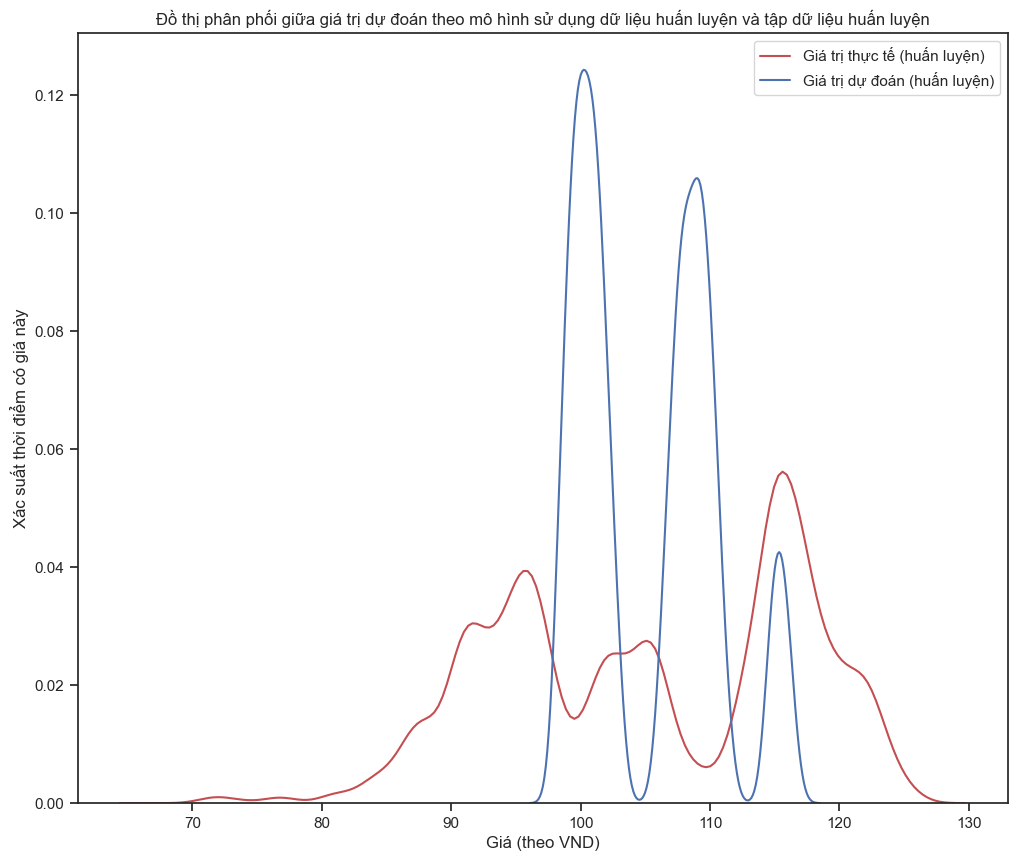

In [19]:
Title = "Đồ thị phân phối giữa giá trị dự đoán theo mô hình sử dụng dữ liệu huấn luyện và tập dữ liệu huấn luyện"
DistributionPlot(y_train, yhat, "Giá trị thực tế (huấn luyện)", "Giá trị dự đoán (huấn luyện)", Title)

In [20]:
# Kiểm tra chỉ số R^2 để xem xét độ chính xác của mô hình
print("Chỉ số R^2 của mô hình đối với tệp dữ liệu huấn luyện là", lre.score(x_train, y_train))

Chỉ số R^2 của mô hình đối với tệp dữ liệu huấn luyện là 0.20303769784350423


Kiểm tra mô hình với tập dữ liệu để test

In [21]:
yhat_test = lre.predict(x_test)

C:\Users\pc\AppData\Local\Temp\ipykernel_17256\1933737757.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(ActualFunction, hist=False, color='r', label=ActualName)
C:\Users\pc\AppData\Local\Temp\ipykernel_17256\1933737757.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = 

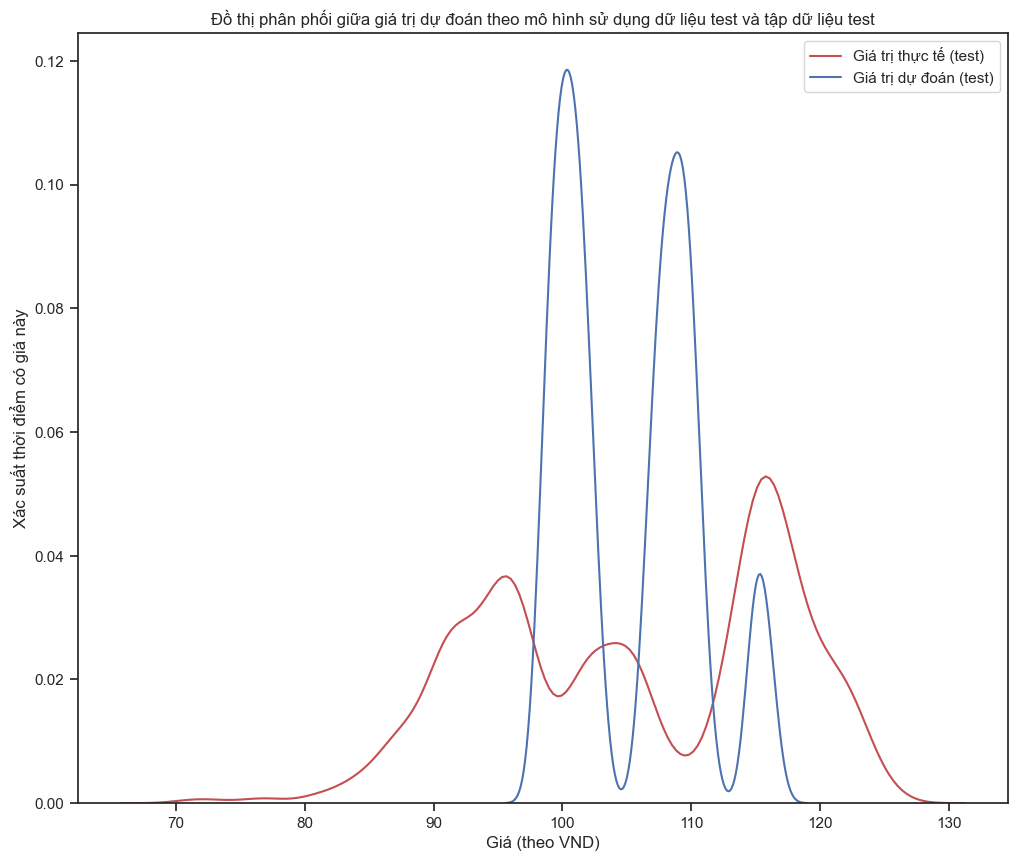

In [22]:
Title = "Đồ thị phân phối giữa giá trị dự đoán theo mô hình sử dụng dữ liệu test và tập dữ liệu test"
DistributionPlot(y_test, yhat_test, "Giá trị thực tế (test)", "Giá trị dự đoán (test)", Title)

In [23]:
# Kiểm tra chỉ số R^2 để xem xét độ chính xác của mô hình
print("Chỉ số R^2 của mô hình đối với tệp dữ liệu test là", lre.score(x_test, y_test))

Chỉ số R^2 của mô hình đối với tệp dữ liệu test là 0.20588187038405237


Đúng như dự đoán độ chính xác của mô hình hồi quy là rất thấp (chỉ số R^2 chỉ đạt khoảng 0.20 cho cả 2 tập dữ liệu dùng để train và test). Chính vì vậy ta sẽ chuyển sang sử dụng mô hình hồi quy đa thức.

# Mô hình hồi quy đa thức

In [24]:
from sklearn.preprocessing import PolynomialFeatures

Chọn số bậc thích hợp dựa trên chỉ số R^2

Text(0.5, 1.0, 'Chỉ số R^2 của từng bậc hồi quy đa thức dựa trên dữ liệu test')

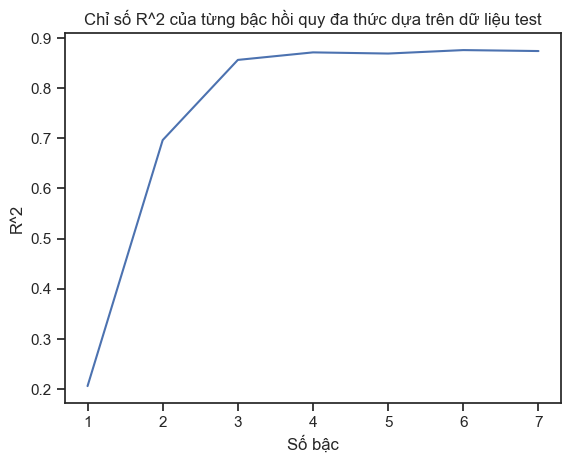

In [26]:
Rsquared_test = list()
order = list(range(1, 8))
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    lre.fit(x_train_pr, y_train)
    Rsquared_test.append(lre.score(x_test_pr, y_test))
    
plt.plot(order, Rsquared_test)
plt.xlabel("Số bậc")
plt.ylabel("R^2")
plt.title("Chỉ số R^2 của từng bậc hồi quy đa thức dựa trên dữ liệu test")

Có thể nhận thấy mô hình hồi quy từ bậc 4 trở đi có sự tăng về R^2 không đáng kể nên để hiệu quả nhất ta sẽ chọn mô hình bậc 4 nhằm tối ưu.

In [27]:
pr4 = PolynomialFeatures(degree=4)
x_train_pr4 = pr4.fit_transform(x_train)
x_test_pr4 = pr4.fit_transform(x_test)
lre.fit(x_train_pr4, y_train)
yhat_test_pr4 = lre.predict(x_test_pr4)

C:\Users\pc\AppData\Local\Temp\ipykernel_17256\1933737757.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(ActualFunction, hist=False, color='r', label=ActualName)
C:\Users\pc\AppData\Local\Temp\ipykernel_17256\1933737757.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = 

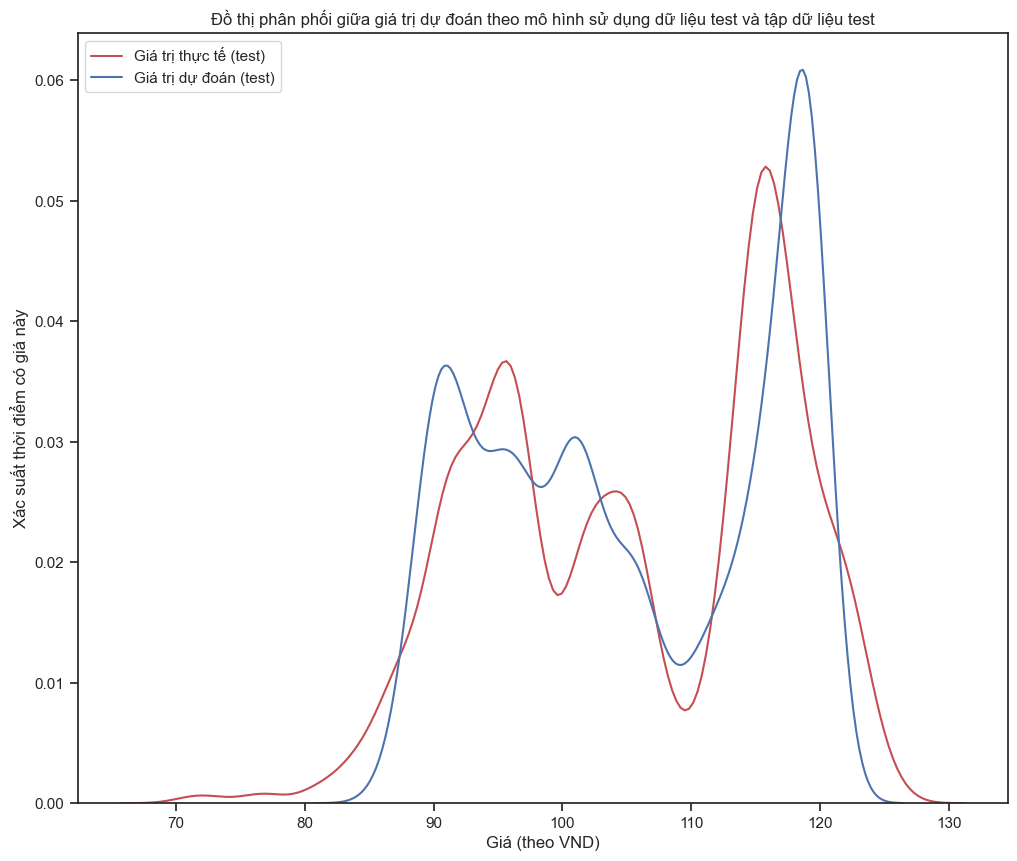

In [28]:
Title = "Đồ thị phân phối giữa giá trị dự đoán theo mô hình sử dụng dữ liệu test và tập dữ liệu test"
DistributionPlot(y_test, yhat_test_pr4, "Giá trị thực tế (test)", "Giá trị dự đoán (test)", Title)

In [29]:
print("Giá trị dự đoán:", yhat_test_pr4[0:4])
print("Giá trị thực tế:", y_test[0:4].values)

Giá trị dự đoán: [116.72752082 112.40703731 119.22436108 121.39600756]
Giá trị thực tế: [112.2 117.  116.  123.4]


In [30]:
print("Chỉ số R^2 của mô hình hồi quy đa thức bậc 7 đối với tệp dữ liệu test là", lre.score(x_test_pr4, y_test))

Chỉ số R^2 của mô hình hồi quy đa thức bậc 7 đối với tệp dữ liệu test là 0.8710642630097729


# Kết luận: với mã cổ phiếu biến động mạnh như Vingroup, ta chọn mô hình hồi quy tuyến tính bậc 4 (pr4) nhằm dự báo giá cố phiếu trong tương lai